In [1]:
from scipy import stats
stats.norm.cdf(70,60,10)

0.8413447460685429

In [2]:
stats.norm.cdf(1)

0.8413447460685429

In [3]:
1-stats.norm.cdf(70,60,10)

0.15865525393145707

In [4]:
stats.norm.cdf(680,711,29)

0.14254260383881612

In [5]:
1-stats.norm.cdf(680,711,29)

0.8574573961611839

In [3]:
pnorm(680,711,29)

[1] 0.1425426

In [ ]:
1-pnorm(680,711,29)

[1] 0.8574574

In [2]:
pnorm(740,711,29)-pnorm(697,711,29)

[1] 0.5267112

In [4]:
from scipy import stats
stats.norm.cdf(740,711,29)-stats.norm.cdf(697,711,29)

0.5267111786415019

0.5267111786415019

In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn

In [7]:
beml_df = pd.read_csv("BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [8]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [9]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [10]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [11]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [12]:
beml_df


,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


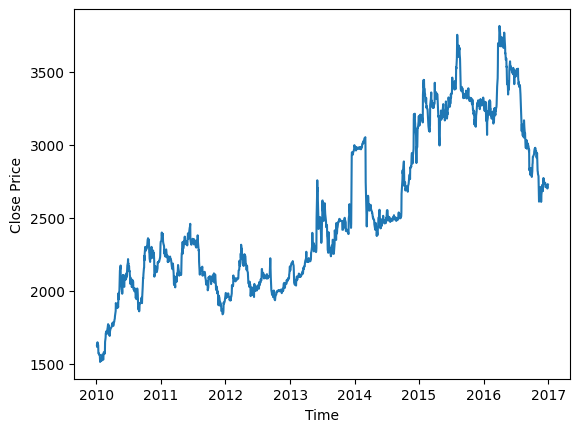

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

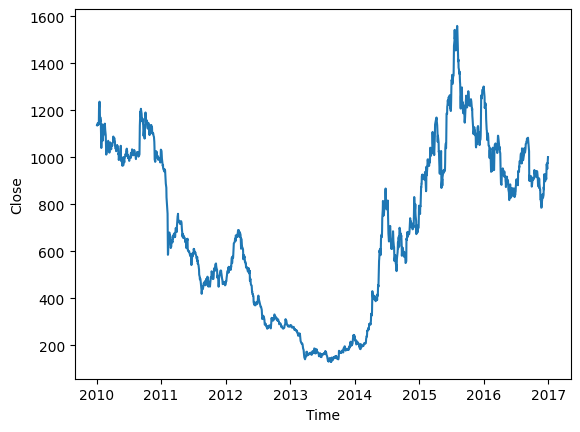

In [14]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [15]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)
beml_df
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [ ]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()
glaxo_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [16]:
glaxo_df.isnull().sum()

Date     0
Close    0
gain     1
dtype: int64

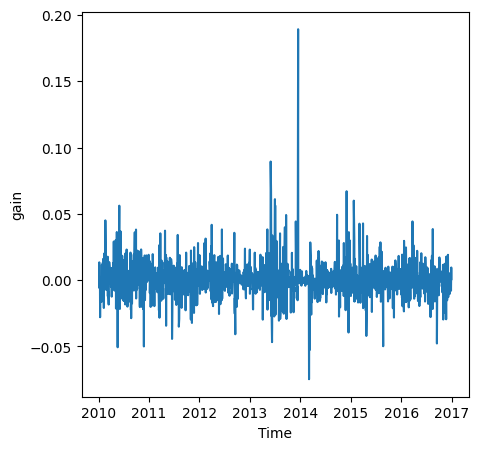

In [17]:
#Plot the gains
plt.figure(figsize = (5, 5))
plt.plot(glaxo_df.index, glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')
plt.show()

In [18]:
glaxo_df['gain'].mean()
np.round(glaxo_df.gain.mean(),4)


0.0004

In [19]:
beml_df['gain'].mean()
np.round(glaxo_df.gain.mean(),4)

0.0004

In [20]:
print(np.round(glaxo_df.gain.std(),4))
np.round(beml_df.gain.std(),4)

0.0134


0.0264

In [21]:
print('Mean:', np.round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', np.round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [22]:
print('Mean: ', np.round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', np.round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [23]:
from scipy import stats
stats.norm.ppf(0.975)

1.959963984540054

In [24]:
stats.norm.ppf(0.95)

1.6448536269514722

In [25]:
stats.norm.ppf(0.90)

1.2815515655446004

In [26]:
stats.norm.interval(0.95,20,0.25)

(19.510009003864987, 20.489990996135013)

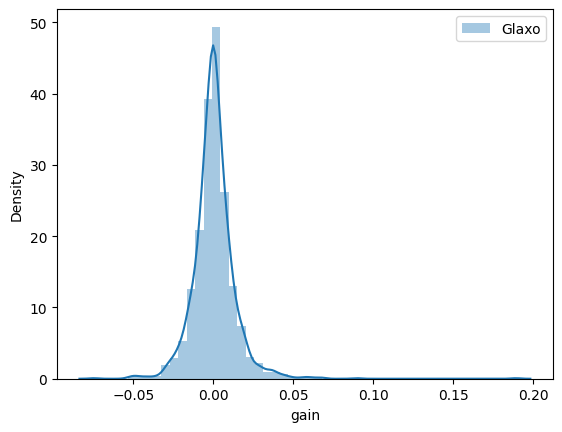

In [27]:
import warnings
warnings.filterwarnings('ignore')
sn.distplot(glaxo_df.gain, label = 'Glaxo')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
plt.show()

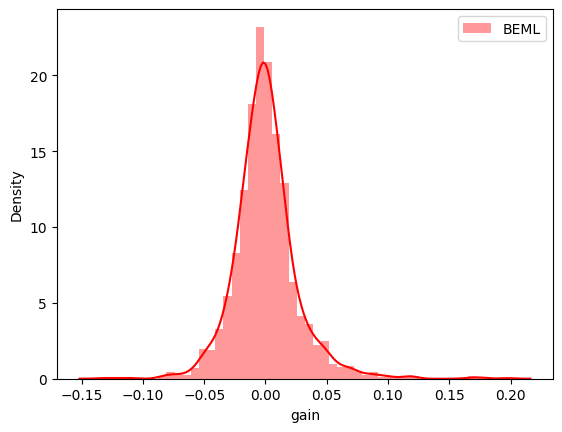

In [28]:
sn.distplot(beml_df.gain, label = 'BEML',color="r")
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
plt.show()

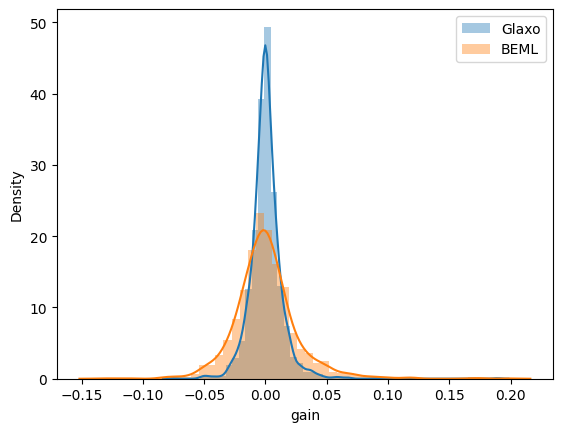

In [29]:
X = pd.DataFrame(columns = ["beml_df.gain","glaxo_df.gain"])
X["beml_df.gain"] = pd.Series(beml_df.gain)
X["glaxo_df.gain"] = pd.Series(glaxo_df.gain)
sn.distplot(X['glaxo_df.gain'],label = 'Glaxo')
sn.distplot(X['beml_df.gain'],label = 'BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

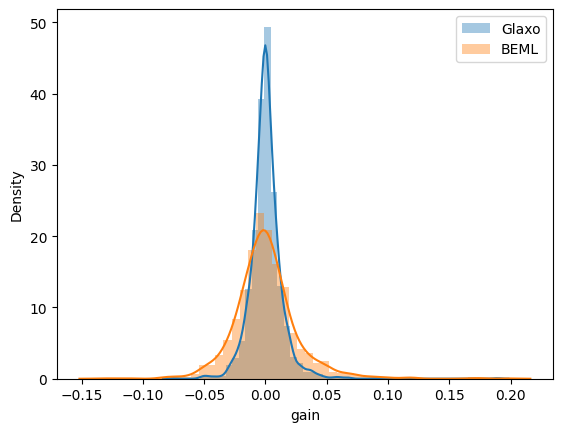

In [30]:
X = pd.DataFrame(columns = ["beml_df.gain","glaxo_df.gain"])
X
X["beml_df.gain"] = pd.Series(beml_df.gain)
X
X["glaxo_df.gain"] = pd.Series(glaxo_df.gain)
X
sn.distplot(X['glaxo_df.gain'],label = 'Glaxo')
sn.distplot(X['beml_df.gain'],label = 'BEML')
plt.legend()
plt.xlabel("gain")
plt.show()

In [31]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
glaxo_df.gain.mean(),
glaxo_df.gain.std())

0.06352488667177401

In [32]:
from scipy import stats
stats.norm.cdf(-0.02, glaxo_df.gain.mean(), glaxo_df.gain.std())

0.06352488667177401

In [33]:
#Probability of making 2% gain or higher in Glaxo
1 - stats.norm.cdf(0.02,
glaxo_df.gain.mean(),
glaxo_df.gain.std())

0.07104511457618568

In [35]:
#Probability of making 2% loss or higher in beml
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755298